In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

from scipy.spatial.transform import Rotation as R  # for rotations
from scipy import linalg   # for eigenvalues 

import matplotlib.tri as tri

hour = 60*60.

#from apophis_subs import *
import apophis_subs


### principal axis rotation examples 

In [64]:
import importlib  # if you need to reload our subroutines!
importlib.reload(apophis_subs)

<module 'apophis_subs' from '/Users/aquillen/Desktop/summer24/rebound-main24/myexamples/pylab/apophis_subs.py'>

In [35]:
mdir = '../apophis5a/'  # data directly
froot = 'c1cc'         # simulation output root 
shape_vol=1.98e+07     # for stress tensor , volume of shape model in m^3
t_datadump =900        # time between data dumps, in s
t0 = -hour*3           # time of first data dump w.r.t to perigee time 
iperi= int(-t0/t_datadump)     # which simulation index is at perigee
nsims = 105 # number of particle/spring outputs
tstop = nsims*t_datadump - t0
t_list_hour = np.arange(t0/hour,tstop/hour,t_datadump/hour)  # array of output times 
# from periceter in hours 

froot_dd = 'c1dd'         # simulation output root 
# 8 hours later after c1cc initial condition from c1 simulation

In [36]:
#nsims=13
print(iperi)

12


In [3]:
# read in simulation outputs and put in a list
def read_sim_list(mdir,froot,shape_vol,nsims):
    sim_list = []
    for i in range(nsims):
        sim = apophis_subs.sim_struct(mdir,froot,i,shape_vol)
        sim_list = np.append(sim_list,sim)
    return sim_list

# rotate all simulations to same orientation as first one
# and make sure first one is oriented in a principal axis direction
def rotate_sim_list(sim_list):
    nsims = sim_list.shape[0]
    sim_list[0].rotate_to_principal() # rotate first simulation to principal axis 
    for i in range(1,nsims):
        sim_list[i].rotate_to_sim(sim_list[0]) # rotate rest to same orientation as first one
    for i in range(0,nsims):
        sim_list[i].compute_stress_tensor()  # compute stress tensor for all of them 
        sim_list[i].compute_L()  # compute spin


In [65]:
# read in simulation outputs and put in a list and do rotations
sim_list = read_sim_list(mdir,froot,shape_vol,nsims)
rotate_sim_list(sim_list) # do rotations and compute stress tensor

../apophis5a/c1cc_000000_springs.txt
../apophis5a/c1cc_000000_particles.txt
../apophis5a/c1cc_000001_springs.txt
../apophis5a/c1cc_000001_particles.txt
../apophis5a/c1cc_000002_springs.txt
../apophis5a/c1cc_000002_particles.txt
../apophis5a/c1cc_000003_springs.txt
../apophis5a/c1cc_000003_particles.txt
../apophis5a/c1cc_000004_springs.txt
../apophis5a/c1cc_000004_particles.txt
../apophis5a/c1cc_000005_springs.txt
../apophis5a/c1cc_000005_particles.txt
../apophis5a/c1cc_000006_springs.txt
../apophis5a/c1cc_000006_particles.txt
../apophis5a/c1cc_000007_springs.txt
../apophis5a/c1cc_000007_particles.txt
../apophis5a/c1cc_000008_springs.txt
../apophis5a/c1cc_000008_particles.txt
../apophis5a/c1cc_000009_springs.txt
../apophis5a/c1cc_000009_particles.txt
../apophis5a/c1cc_000010_springs.txt
../apophis5a/c1cc_000010_particles.txt
../apophis5a/c1cc_000011_springs.txt
../apophis5a/c1cc_000011_particles.txt
../apophis5a/c1cc_000012_springs.txt
../apophis5a/c1cc_000012_particles.txt
../apophis5a

In [38]:
# read in simulation outputs and put in a list and do rotations
sim_list_dd = read_sim_list(mdir,froot_dd,shape_vol,nsims)
rotate_sim_list(sim_list_dd) # do rotations and compute stress tensor

../apophis5a/c1dd_000000_springs.txt
../apophis5a/c1dd_000000_particles.txt
../apophis5a/c1dd_000001_springs.txt
../apophis5a/c1dd_000001_particles.txt
../apophis5a/c1dd_000002_springs.txt
../apophis5a/c1dd_000002_particles.txt
../apophis5a/c1dd_000003_springs.txt
../apophis5a/c1dd_000003_particles.txt
../apophis5a/c1dd_000004_springs.txt
../apophis5a/c1dd_000004_particles.txt
../apophis5a/c1dd_000005_springs.txt
../apophis5a/c1dd_000005_particles.txt
../apophis5a/c1dd_000006_springs.txt
../apophis5a/c1dd_000006_particles.txt
../apophis5a/c1dd_000007_springs.txt
../apophis5a/c1dd_000007_particles.txt
../apophis5a/c1dd_000008_springs.txt
../apophis5a/c1dd_000008_particles.txt
../apophis5a/c1dd_000009_springs.txt
../apophis5a/c1dd_000009_particles.txt
../apophis5a/c1dd_000010_springs.txt
../apophis5a/c1dd_000010_particles.txt
../apophis5a/c1dd_000011_springs.txt
../apophis5a/c1dd_000011_particles.txt
../apophis5a/c1dd_000012_springs.txt
../apophis5a/c1dd_000012_particles.txt
../apophis5a

In [ ]:
### body flip did not work?  x axis was often wrong?
# I may have fixed the problem of body flip, 
# by checking the determinant of the rotation matrix
# made from eigenvectors and making sure it is 1

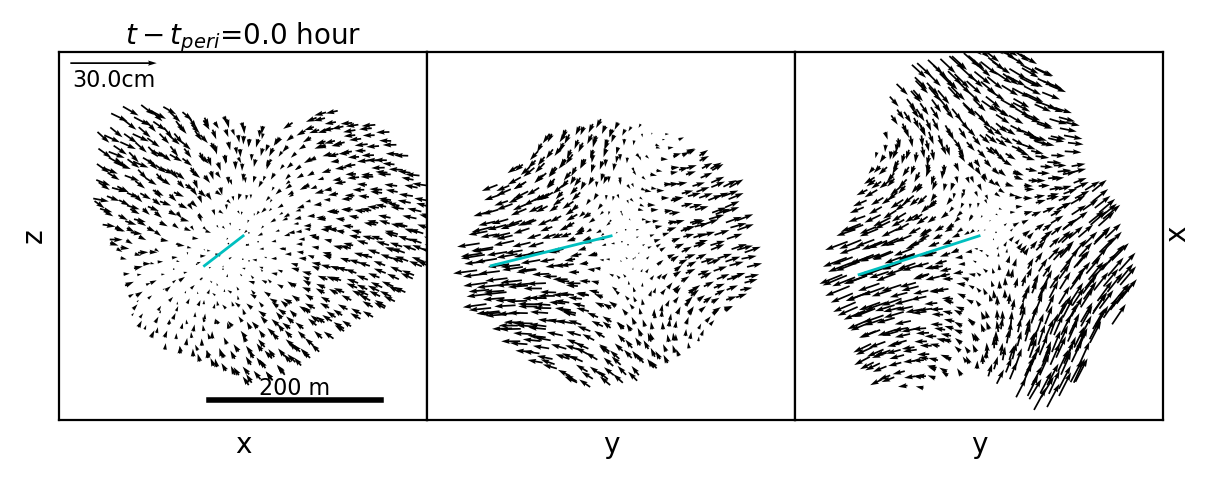

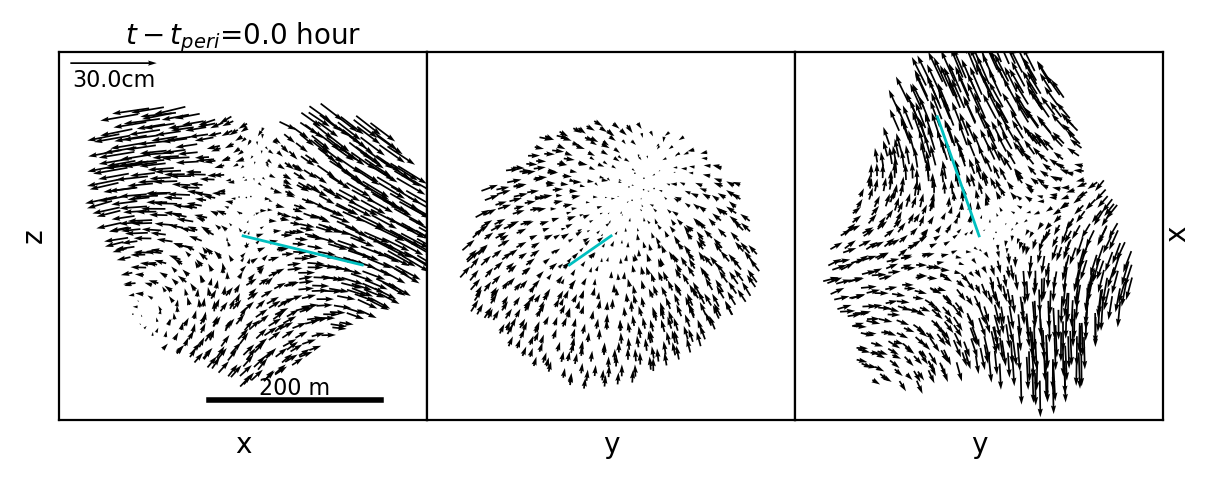

In [63]:
i = iperi
Qscale = 3e-3; Qkey_len=0.3
tlabel ='{:.1f}'.format(t_list_hour[i])
jstr = '{:d}'.format(i) #froot + '_0_J2.png'
if (i<10):
    jstr = '0' + jstr
ofile = froot + '_' + jstr  + 'Q.png'
ofile_dd = froot_dd + '_' + jstr  + 'Q.png'
apophis_subs.plt_def3(sim_list[i]   ,sim_list[0]   ,Qscale,Qkey_len,tlabel,ofile)
apophis_subs.plt_def3(sim_list_dd[i],sim_list_dd[0],Qscale,Qkey_len,tlabel,ofile_dd)

## we verify that deformation is larger if tidal pull is along long axis

We are likely to see both wobble and normal modes after encounter 

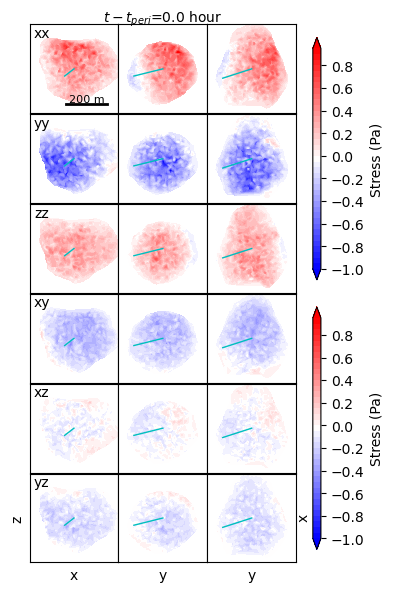

In [50]:
# plot stress tensor differential
j = iperi; tlabel ='{:.1f}'.format(t_list_hour[j])
apophis_subs.plt_sig6(sim_list[j],sim_list[0],1,-1.0,1.0,0.05,-1.0,1.0,0.05,tlabel,'')

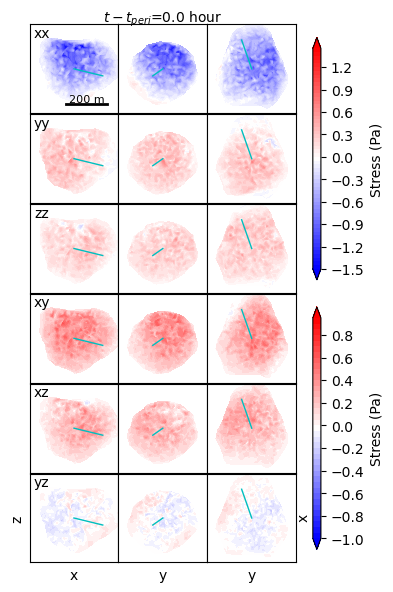

In [52]:
# plot stress tensor differential
j = iperi; tlabel ='{:.1f}'.format(t_list_hour[j])
apophis_subs.plt_sig6(sim_list_dd[j],sim_list_dd[0],1,-1.5,1.5,0.05,-1.0,1.0,0.05,tlabel,'')

In [ ]:
# this answers the question of the size of differences as a function of rotation 
# phase ?


In [13]:
# check potential and sping rotational energy, looks ok
# t x y z vx vy vz omx omy omz llx lly llz Ixx Iyy Izz Ixy Iyz Ixz KErot PEspr PEgrav Etot dEdtnow
# 0 1 2 3 4  5  6  7  8     9  10  11  12  13   14  15 16   17 18  19    20
# read ext
def read_ext(mdir,froot):
    #springs[i].i, springs[i].j,
    # springs[i].ks, springs[i].rs0, springs[i].gamma, springs[i].k_heat
    sfname = mdir + froot  + '_ext.txt'
    print(sfname)
    mtab = np.loadtxt(sfname)
    KErot = np.array(mtab[:,19])
    PEspr = np.array(mtab[:,20])
    tarr = np.array(mtab[:,0])
    return tarr,KErot,PEspr

mdir = '../apophis5a/'  # data directly
tarr,KErot,PEspr=read_ext(mdir,'c1') 
# check the relaxing body KE or PE

../apophis5a/c1_ext.txt


(1113000.0, 1116000.0)

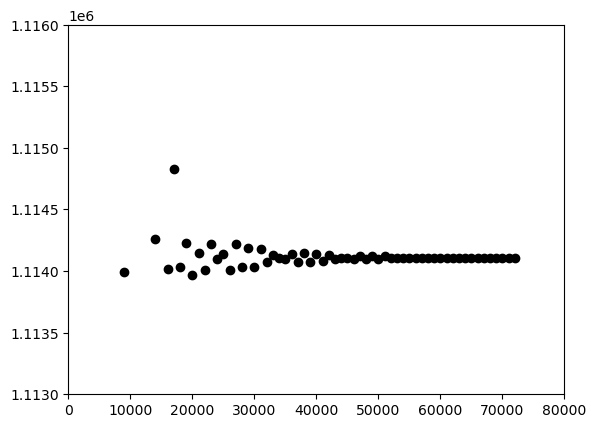

In [32]:
#plt.plot(tarr,KErot,'o')
plt.plot(tarr,PEspr,'ko')
plt.xlim([0,80000])
plt.ylim([1.113e6,1.116e6])

In [77]:
pos_E_peri = sim_list[iperi].posE
pos_E_peri2 = sim_list[iperi+1].posE
dpos = pos_E_peri2 - pos_E_peri
vE = dpos/t_datadump
vel_E = np.sqrt(np.sum(vE*vE))
print('vel_E {:.2e} m/s'.format(vel_E))

vel_E 5.54e+03 m/s


In [68]:
v_peri_vec

array([-9.69969844e-12,  4.68534571e-12, -1.28464129e-13])